In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [32]:
%matplotlib inline

In [33]:
df = pd.read_csv('C:\\Users\\builduser\\Desktop\\model 1.csv')
df

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
0,0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
1,0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
2,0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
3,0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
4,0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756
...,...,...,...,...,...,...,...,...,...
2043,8.179999,0.371901,-0.012508,628403263,-1768.112183,5325580,2748.277588,1.031282,1199.999634
2044,8.183999,0.437352,-0.029764,628403256,-1802.444458,5325591,2763.377930,1.033880,1199.999634
2045,8.187999,0.474551,-0.020807,628403249,-1781.845093,5325602,2803.645752,0.962427,1199.999634
2046,8.191999,0.571133,-0.048983,628403242,-1860.809326,5325613,2823.779541,0.949072,1199.999634


In [35]:
a = df.groupby(['timestamp']).sum()

,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
timestamp,,,,,,,,
0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756
...,...,...,...,...,...,...,...,...
8.179999,0.371901,-0.012508,628403263,-1768.112183,5325580,2748.277588,1.031282,1199.999634
8.183999,0.437352,-0.029764,628403256,-1802.444458,5325591,2763.377930,1.033880,1199.999634
8.187999,0.474551,-0.020807,628403249,-1781.845093,5325602,2803.645752,0.962427,1199.999634


In [99]:
b = np.array(df['pCut::Motor_Torque'])

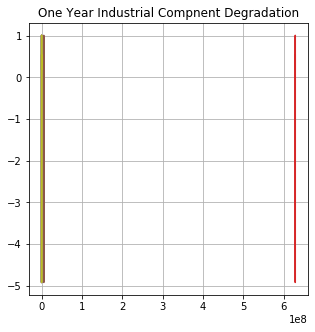

In [100]:
plt.figure(figsize=(5, 5))
plt.plot(a, b)
plt.title('One Year Industrial Compnent Degradation')
plt.grid(True)
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression 


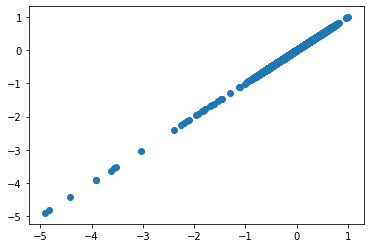

In [105]:
linear_regressor = LinearRegression()
linear_regressor.fit(b.reshape(-1,1), b.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y1_pred = linear_regressor.predict(b.reshape(-1,1))

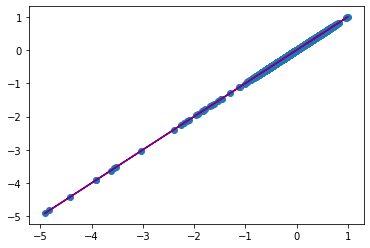

In [107]:
plt.scatter(b.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(b.reshape(-1,1) ,y1_pred,color='purple')

In [108]:
c = np.array(df['pCut::CTRL_Position_controller::Lag_error'])

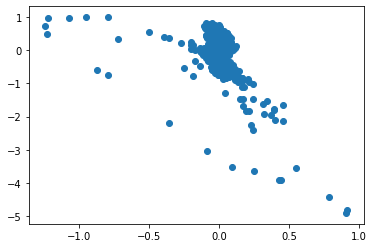

In [110]:
linear_regressor = LinearRegression()
linear_regressor.fit(c.reshape(-1,1), b.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y = linear_regressor.predict(c.reshape(-1,1))

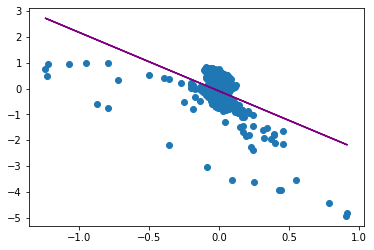

In [112]:
plt.scatter(c.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(c.reshape(-1,1) ,y,color='purple')

In [114]:
d = np.array(df['pCut::CTRL_Position_controller::Actual_position'])

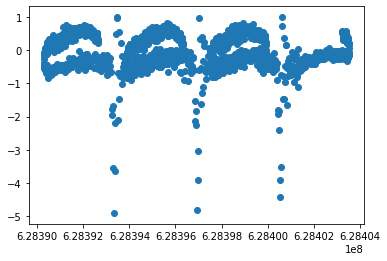

In [116]:
linear_regressor = LinearRegression()
linear_regressor.fit(d.reshape(-1,1), b.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
y1 = linear_regressor.predict(d.reshape(-1,1))

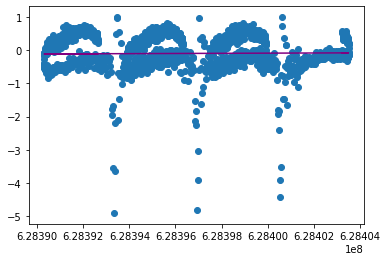

In [118]:
plt.scatter(d.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(d.reshape(-1,1) ,y1,color='purple')

In [120]:
e = np.array(df['pCut::CTRL_Position_controller::Actual_speed'])

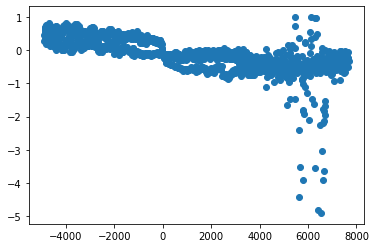

In [122]:
linear_regressor = LinearRegression()
linear_regressor.fit(e.reshape(-1,1), b.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
yint = linear_regressor.predict(e.reshape(-1,1))

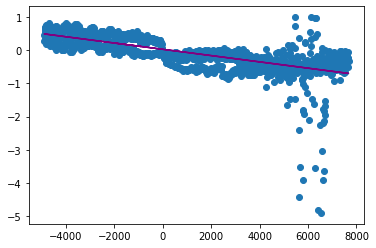

In [124]:
plt.scatter(e.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(e.reshape(-1,1) ,yint,color='purple')

In [125]:
f = np.array(df['pSvolFilm::CTRL_Position_controller::Actual_position'])

In [127]:
linear_regressor = LinearRegression()
linear_regressor.fit(f.reshape(-1,1), b.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y2 = linear_regressor.predict(f.reshape(-1,1))

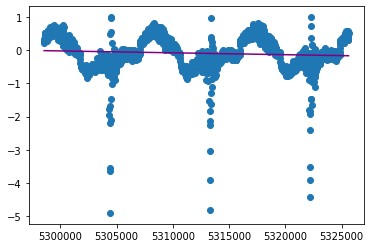

In [132]:
plt.scatter(f.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(f.reshape(-1,1) ,y2,color='purple')

In [133]:
g = np.array(df['pSvolFilm::CTRL_Position_controller::Actual_speed'])

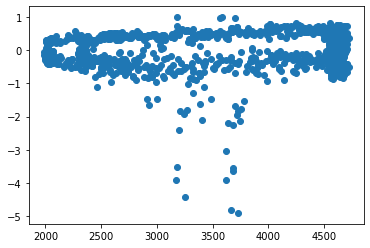

In [134]:
plt.scatter(g,b)

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(g.reshape(-1,1), b.reshape(-1,1))

In [137]:
y3 = linear_regressor.predict(g.reshape(-1,1))

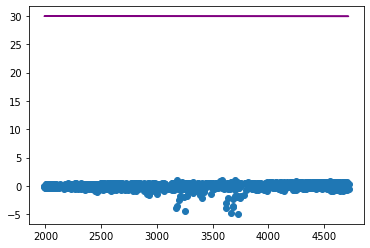

In [138]:
plt.scatter(g.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(g.reshape(-1,1) ,y3,color='purple')

In [139]:
h = np.array(df['pSvolFilm::CTRL_Position_controller::Lag_error'])

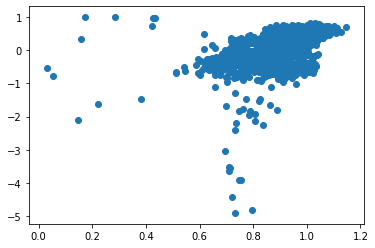

In [140]:
plt.scatter(h,b)

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(h.reshape(-1,1), b.reshape(-1,1))

In [142]:
y4 = linear_regressor.predict(h.reshape(-1,1))

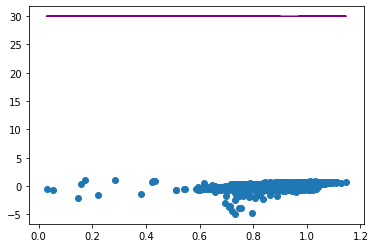

In [143]:
plt.scatter(h.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(h.reshape(-1,1) ,y4,color='purple')

In [144]:
i = np.array(df['pSpintor::VAX_speed'])

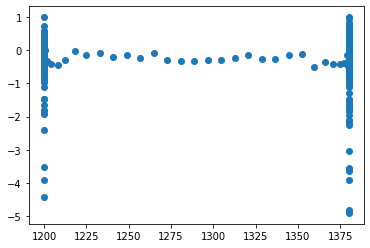

In [145]:
plt.scatter(i, b)

In [146]:
linear_regressor = LinearRegression()
linear_regressor.fit(i.reshape(-1,1), b.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
y5 = linear_regressor.predict(i.reshape(-1,1))

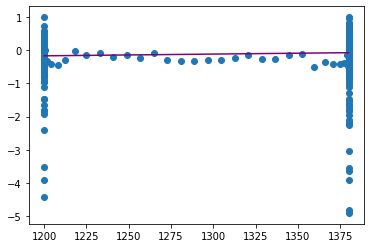

In [148]:
plt.scatter(i.reshape(-1,1) ,b.reshape(-1,1))
plt.plot(i.reshape(-1,1) ,y5,color='purple')